***Activity 9: Neural Networks*** \\
**Submitted by: Jonabel Eleanor B. Baldres** \\
**App Physics 157 WFY-FX-2**


In [435]:
# importing necessary codes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split as split
from google.colab import drive

#Part 1: Sine Function Appproximation

In [436]:
#all the necessary functions
def model(x):
  '''normalized sine function that will be used for approximation'''
  output = np.sin(2*np.pi*x)
  output = (output - np.min(output))/(np.max(output) - np.min(output))
  output = np.reshape(output, (len(x), 1))
  return output

def tanh(a, derivative = False):
  '''getting the hyperbolic tangent function and its derivative '''
  if derivative == False:
      output = np.tanh(a)
  else:
      output = 1 + (np.tanh(a))**2
  return output

def sigmoid(a, derivative = False):
  '''getting the sigmoid function and its derivative '''
  if derivative == False:
      output = 1/(1 + np.exp(-a))
  else:
      s = sigmoid(a)
      output = s*(1 - s)
  return output


def linear(x, derivative = False):
  '''getting the linear function and its derivative '''
  if derivative == False:
      output = x
  else:
      output = 1
  return output

def rectified_linear(x, derivative = False):
    '''getting the rectified linear function and its derivative '''
    if derivative == False:
        output = np.maximum(0,x)
    else:
        output = np.maximum(0,1)
    return output


In [437]:
def x_vectors(x, n):
    vectors = []
    for i in range(n):
        vectors.append(x**i)
    vecs = np.dstack(np.split(np.array(vectors), n))
    vecs = np.reshape(vecs, (vecs.shape[1], vecs.shape[2]))
    return vecs

def initialize_weights(input_size, hidden_size, output_size, factor = 0.01):
    omega0 = np.random.randn(hidden_size,input_size)*factor
    omega1 = np.random.randn(output_size, hidden_size)*factor
    weights = {'omega0': omega0, 'omega1': omega1,}
    return weights

def compute_loss():
  '''calculates the loss function through root mean squared error'''
  pass

In [438]:
def training(x, validation, weights_biases, learning_rate, afunc_hidden, afunc_out, error_threshold, error_tracker = False):
    omega_h = weights_biases['omega0'].copy()
    omega_o = weights_biases['omega1'].copy()
    loss = []
    max_epoch = 50000
    epoch_counter = 1

    while True:
        # Getting outputs of the hidden layer
        aji = np.dot(x, omega_h.T)
        hidden_layer = afunc_hidden(aji )

        # Getting output
        ak = np.dot(hidden_layer, omega_o.T)
        output_layer = afunc_out(ak )

        # RMSE
        error = output_layer - validation
        current_loss = np.sqrt(np.mean(error**2))
        loss.append(current_loss)

        # For debugging
        if error_tracker == True:
            if epoch_counter%100 == 0:
                print('RMSE at epoch', epoch_counter, ': ', current_loss)

        # Breaks if RMSE is lesser than the threshold or if the maximum number of epochs have been reached
        if current_loss < error_threshold:
            break
        elif epoch_counter >= max_epoch:
            break
        # Solving for the error of the output
        delta_output = afunc_out((ak ), derivative = True)*error

        # Solving for the error of the hidden units
        delta_hidden = afunc_hidden(aji , derivative = True)*np.dot(delta_output, omega_o)

        # Solving for the error derivatives
        E_hidden_derivative = np.dot(x.T, delta_hidden).T
        E_output_derivative = np.dot(hidden_layer.T,delta_output).T

        # updating weights
        omega_h += -learning_rate*E_hidden_derivative
        omega_o += -learning_rate*E_output_derivative

        epoch_counter +=1

    return output_layer, np.array(loss), omega_h, omega_o


In [439]:
def create_plots(x, predictions, validation,  RMSE, input_size, hidden_size, afunc_h, afunc_o, learning_rate, error_threshold):
    epochs = np.arange(1, len(loss)+1, 1)
    fig, ax = plt.subplots(1,2, figsize = (15,6))
    ax[0].scatter(x, validation, label = 'Actual', color = 'lightcoral')
    ax[0].plot(x, predictions, linestyle = '--', lw = 2, color = 'saddlebrown', label = 'Predicted')
    ax[0].set_xlabel('$x$')
    ax[0].set_ylabel('$y$')
    ax[0].set_title(
                    'Input size: ' + str(input_size) +
                    '; Hidden size: ' + str(hidden_size) +
                    '\nHidden Activation function: ' + str(afunc_h.__name__) +
                    '\nOutput Activation function: ' + str(afunc_o.__name__),
                    loc = 'center')
    ax[0].legend()

    ax[1].plot(epochs, loss, linestyle = '--', marker = 'o', color = 'cadetblue')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss Function')

    if RMSE[len(loss)-1] >= error_threshold:
        ax[1].set_title(
                    '\nTotal epochs: ' + str(len(RMSE))+
                    '\nFinal Error: ' + str(RMSE[len(RMSE)-1])+
                    '\nRemark: Cut short. Took so long. ',
                    loc = 'center'
        )
    else:
        ax[1].set_title('Loss Function vs Epochs' +
                    '\nTotal epochs: ' + str(len(RMSE)),
                    loc = 'center'
        )

    plt.tight_layout()
    plt.show()

In [440]:
input_size = 6
hidden_size = 10
learning_rate = 0.01
x = np.linspace(0, 1, 100)
x_vec = x_vectors(x, input_size)
error_threshold = 0.01
weights = initialize_weights(input_size, hidden_size, 1)
validation = model(x)

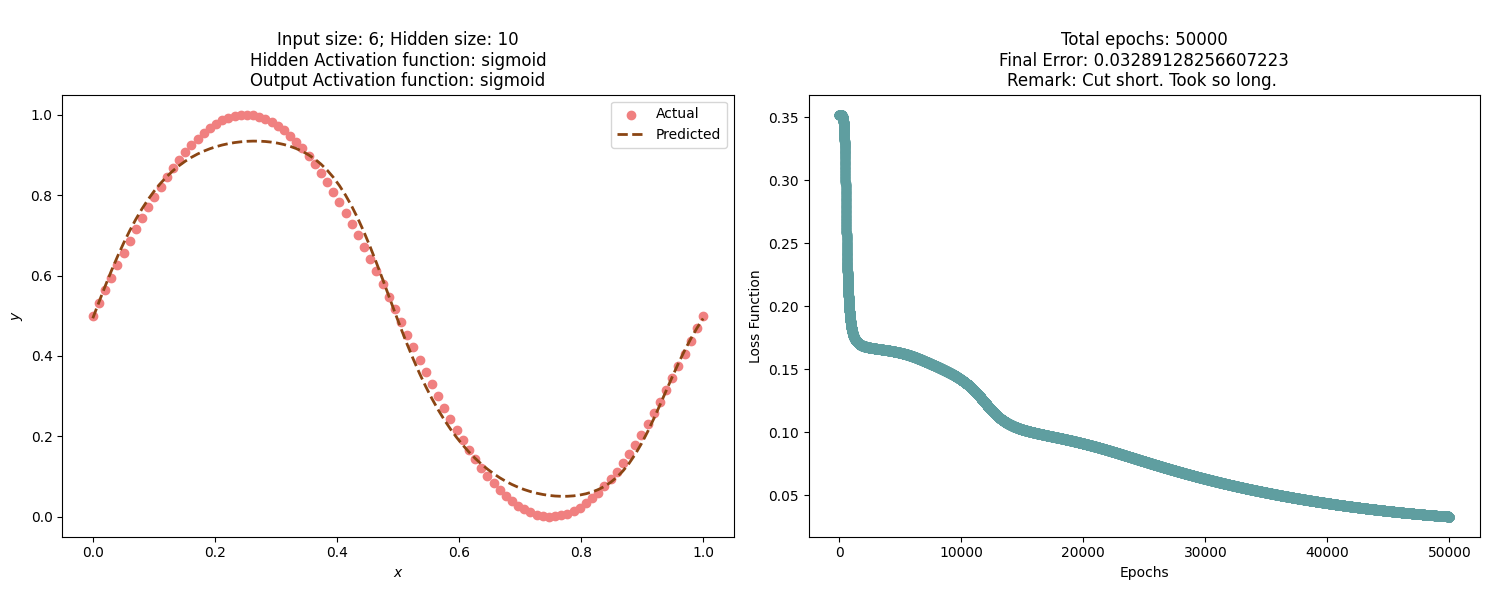

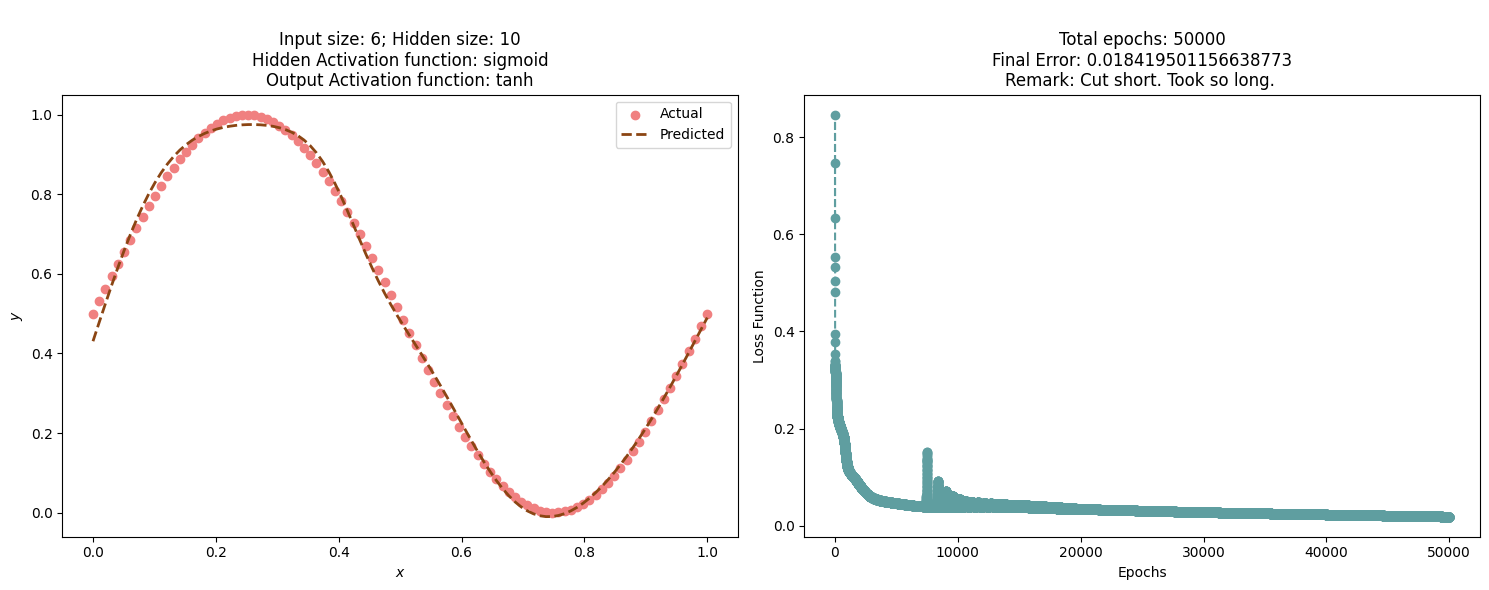

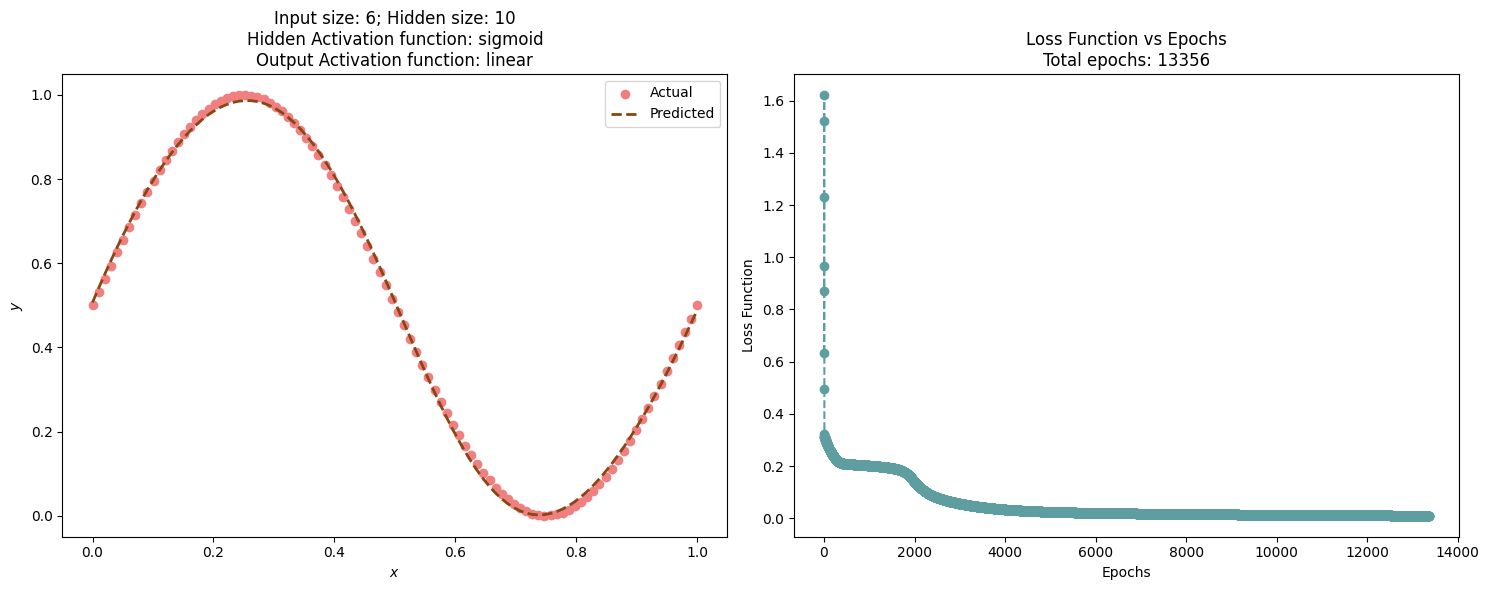

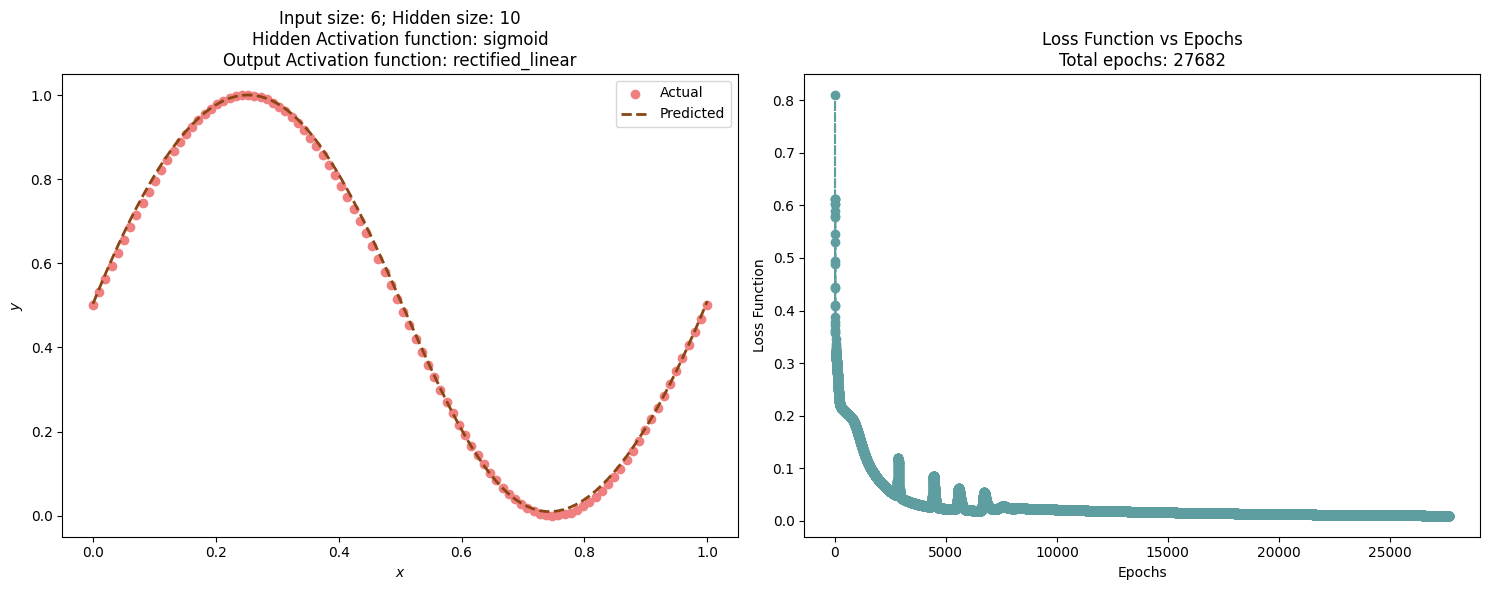

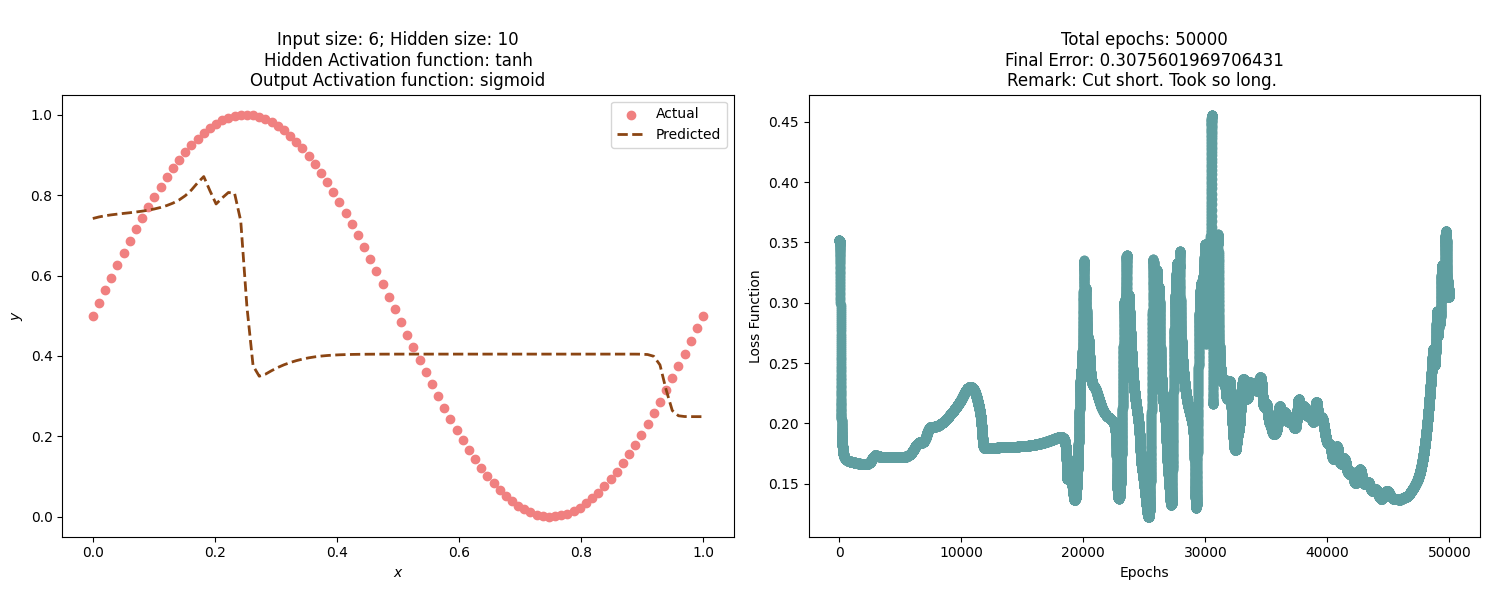

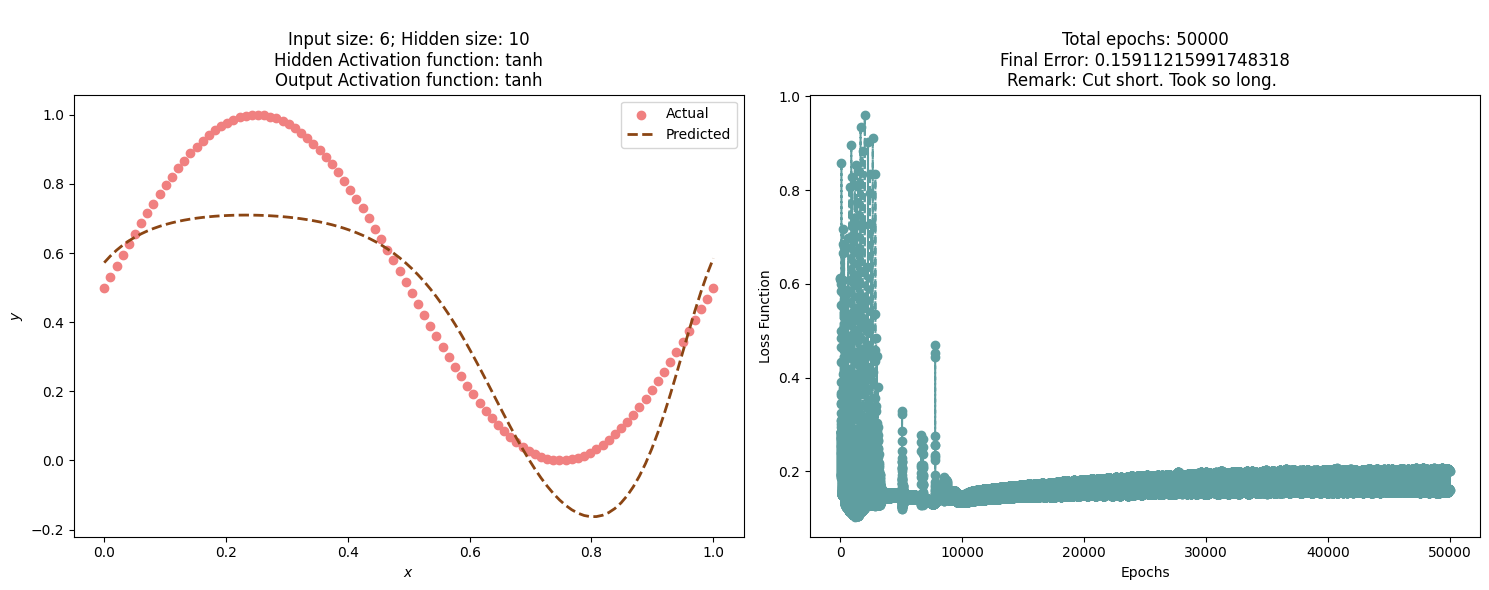

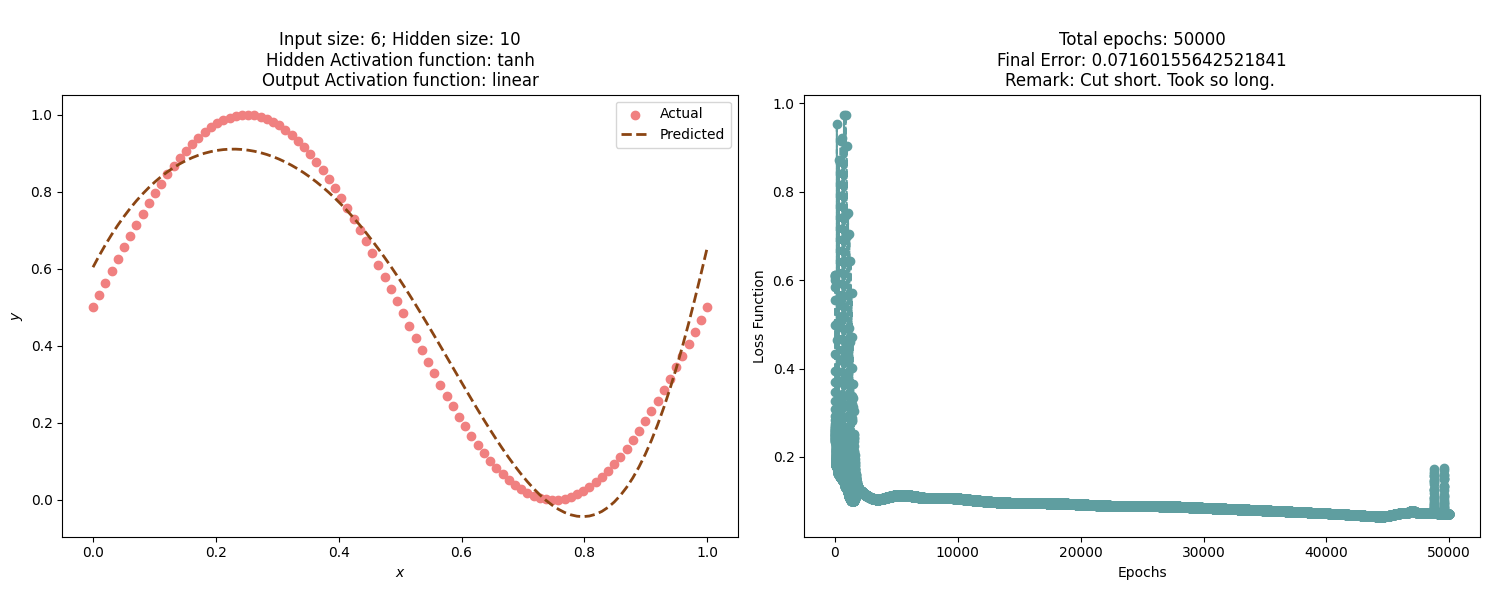

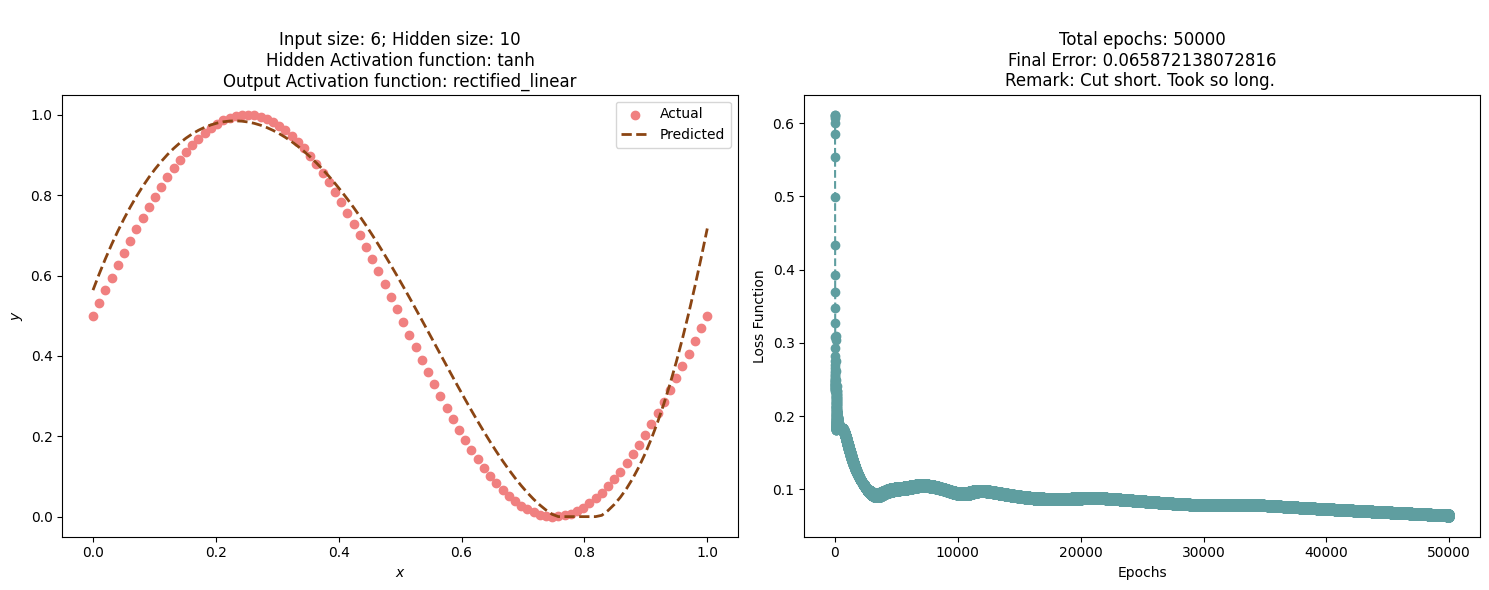

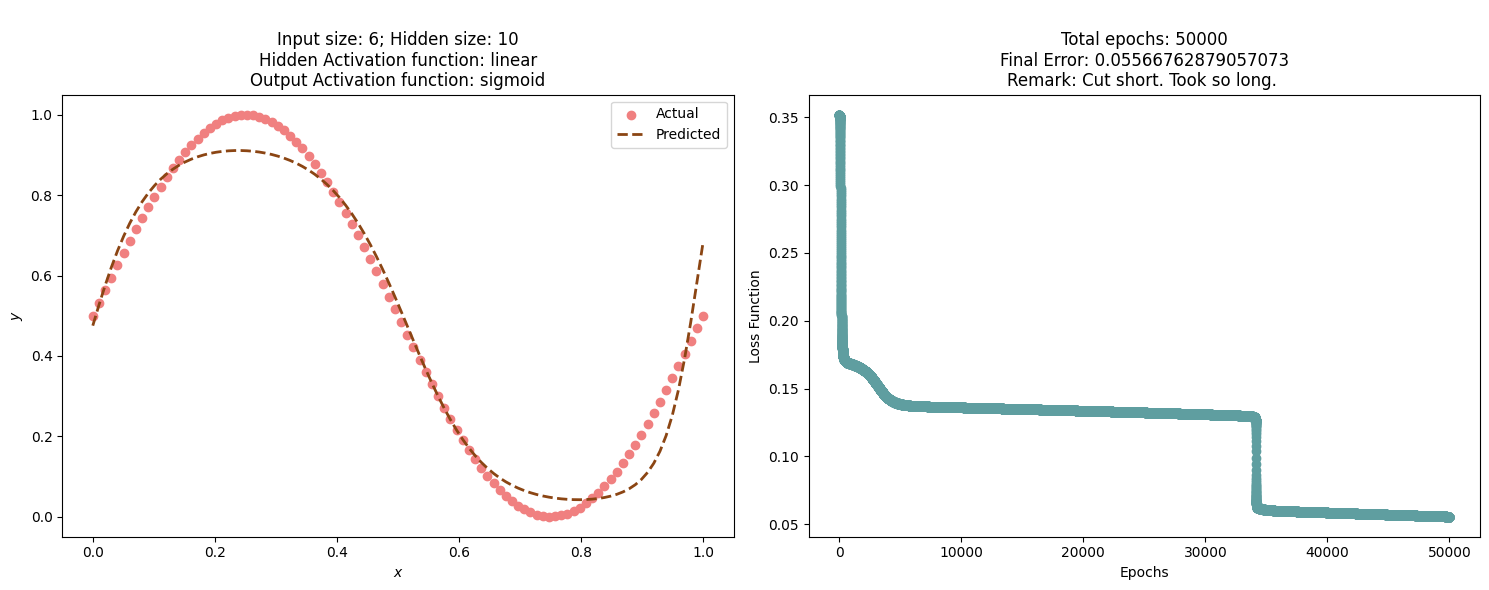

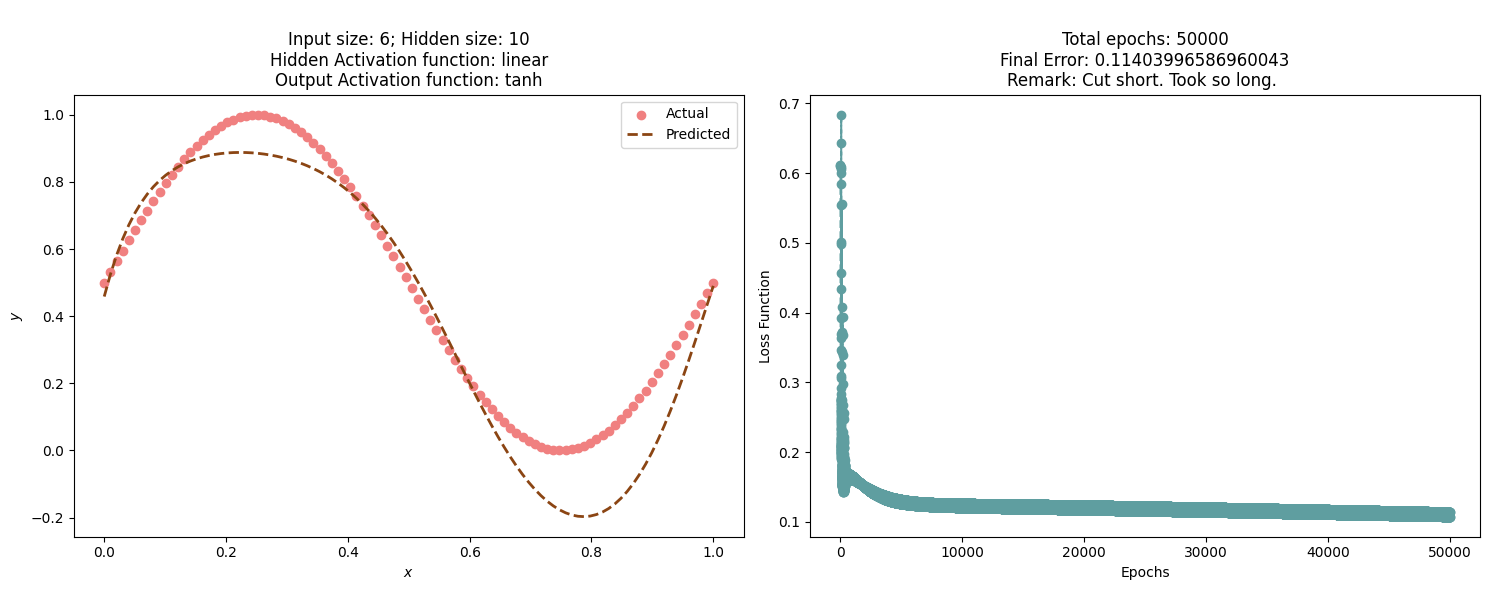

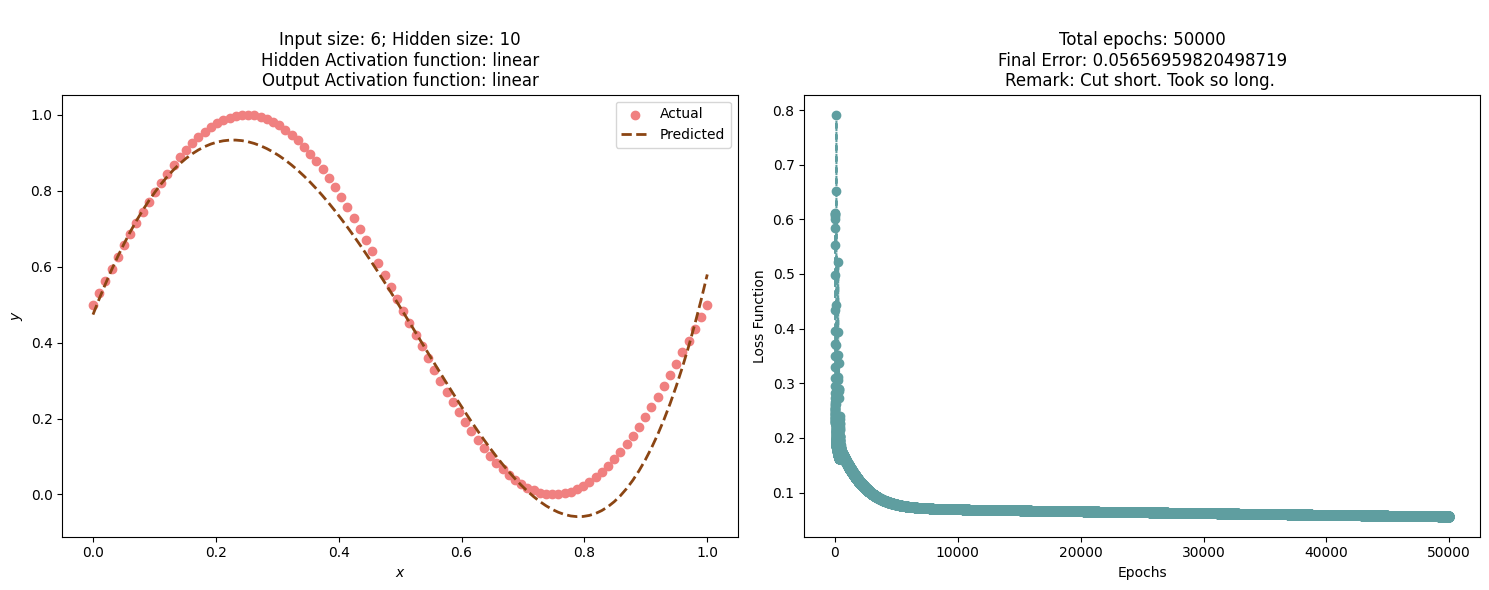

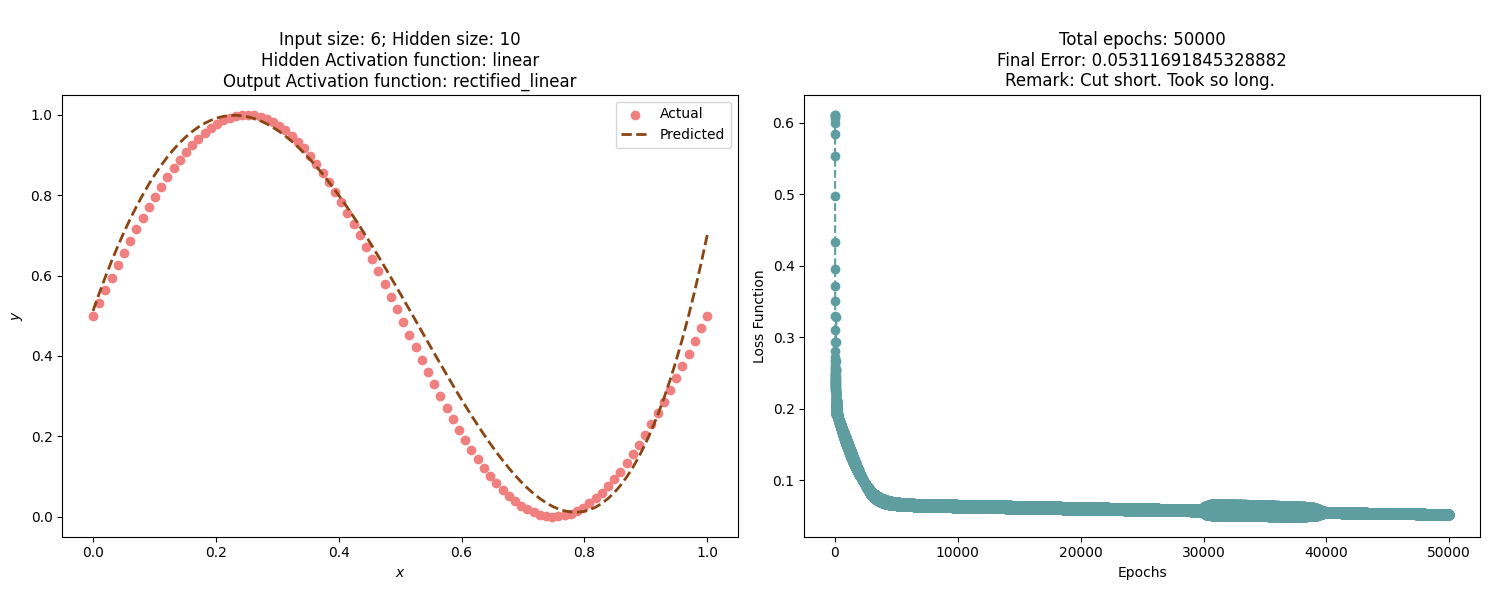

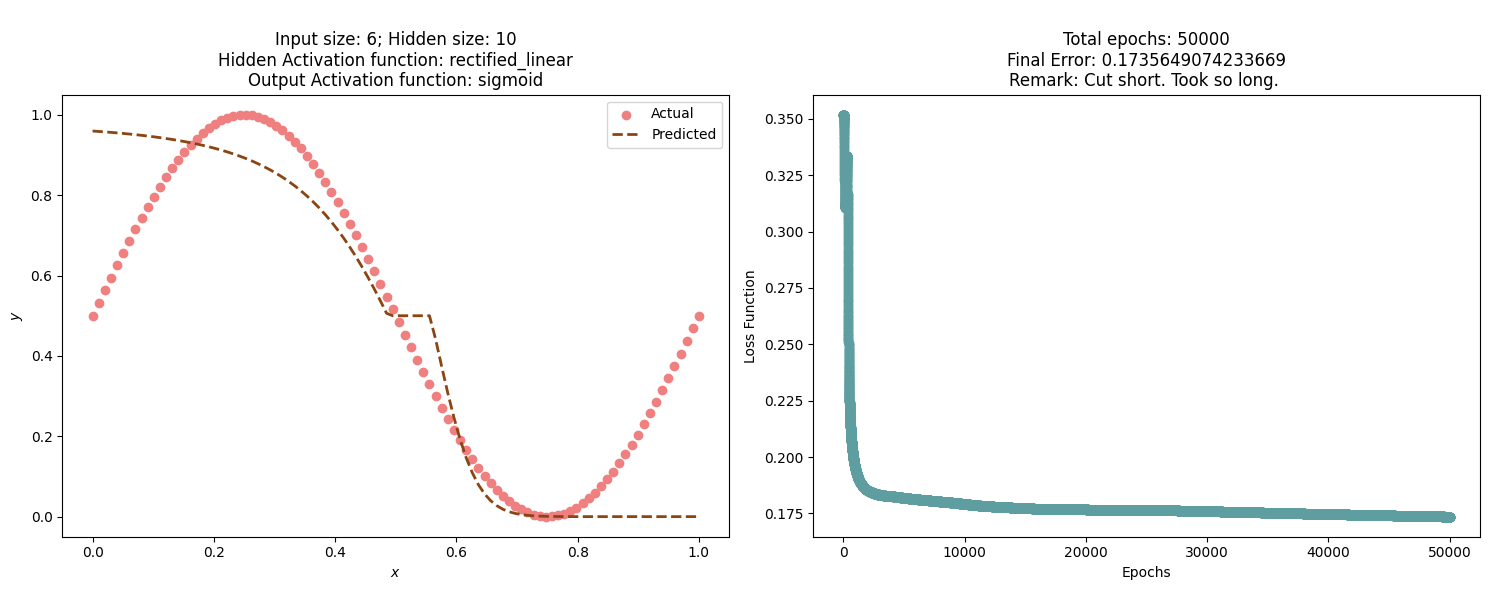

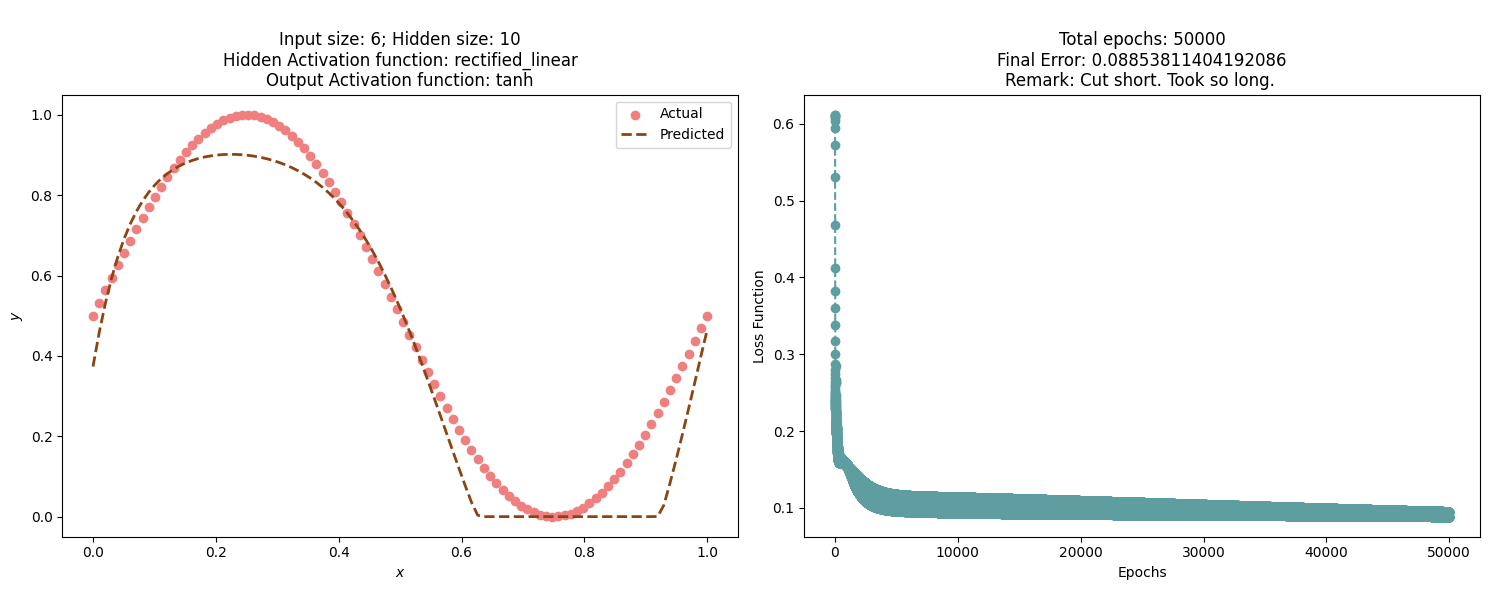

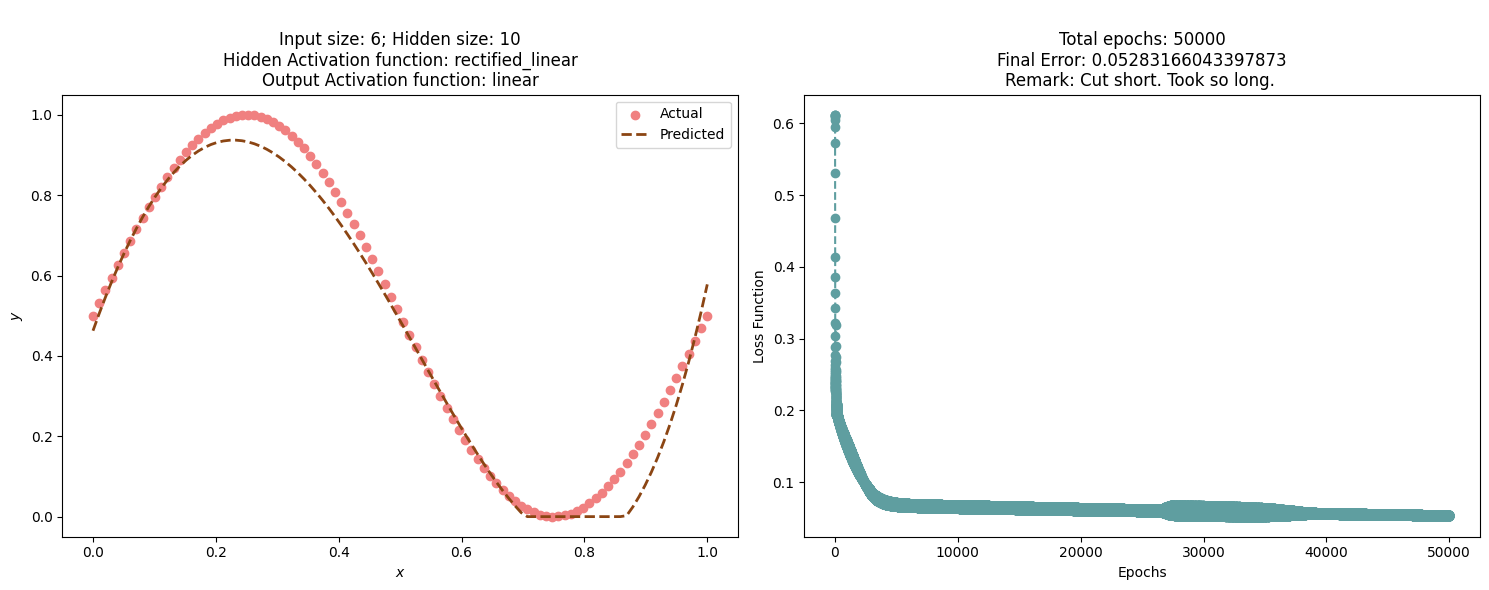

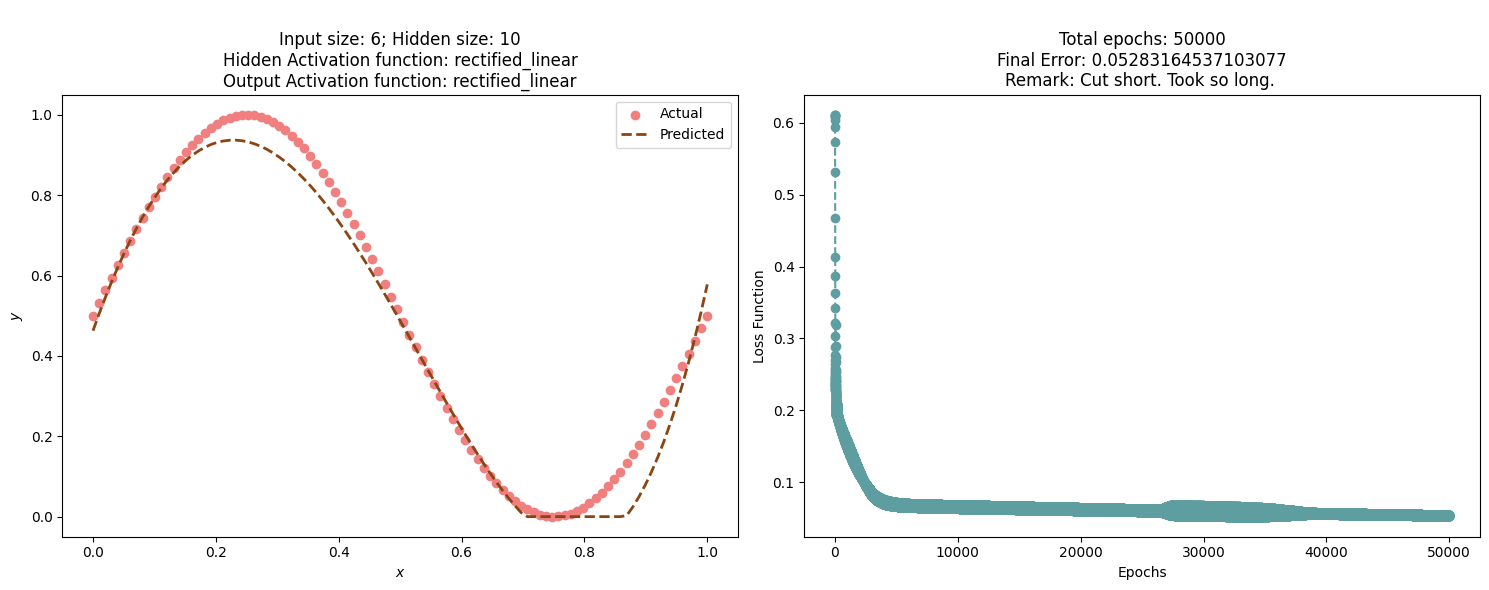

In [441]:
activation_function = [[sigmoid, sigmoid], [sigmoid, tanh], [sigmoid, linear], [sigmoid, rectified_linear],
                       [tanh, sigmoid], [tanh, tanh], [tanh, linear], [tanh, rectified_linear],
                       [linear, sigmoid], [linear, tanh], [linear, linear], [linear, rectified_linear],
                       [rectified_linear, sigmoid], [rectified_linear, tanh], [rectified_linear, linear], [rectified_linear, rectified_linear]
]

for i in activation_function:
    z, loss, omega_h, omega_o = training(x_vec, validation, weights, learning_rate, i[0], i[1], error_threshold)
    create_plots(x, z, validation,  loss, input_size, hidden_size, i[0], i[1], learning_rate, error_threshold)

# Part 2: Fruit Classification

The dataset used was converted from an initial .mat file to .csv file. The same file was used for Perceptron algorithm

In [442]:
data_path = '/content/drive/MyDrive/'
def Extract(filename1, filename2, features):
    df1 = pd.read_csv(data_path + filename1)
    df2 = pd.read_csv(data_path + filename2)

    df1_features = df1.loc[:,features]
    df2_features = df2.loc[:,features]

    return df1_features, df2_features

def vectorize(data):
    output = data.copy()
    return np.array(output)

def normalize(data_in1, data_in2):
    data_1 = data_in1.copy()
    data_2 = data_in2.copy()

    data_1.iloc[:,1] *= 1/255
    data_2.iloc[:,1] *= 1/255

    return data_1, data_2


In [443]:
# Loading the data
BananaD, AppleD = Extract('Banana.csv', 'Apple.csv', ['Feature1', 'Feature2'])
norm_BananaD, norm_AppleD = normalize(BananaD, AppleD)

# Vectorizing
BananaV = vectorize(norm_BananaD)
AppleV = vectorize(norm_AppleD)

# Splitting the data into training and testing
BananaTrain, BananaTest, AppleTrain, AppleTest = split(BananaV, AppleV, train_size= .5)

# For validation
Bananavalidation = np.tile(1, (len(BananaTrain), 1))
Applevalidation = np.tile(0, (len(AppleTrain), 1))

#Compilation
Combined_train = np.concatenate((BananaTrain, AppleTrain))
Combined_validation = np.concatenate((Bananavalidation, Applevalidation))

In [444]:
def Classification(testing, validation, label1, label2, textlabel1, textlabel2, real_classification, omega_0, omega_1, afunc_hidden, afunc_out):

    # Getting outputs of the hidden layer
    z_j = np.dot(testing, omega_0.T)
    hidden_layer = afunc_hidden(z_j )

    # Getting output
    a_k = np.dot(hidden_layer, omega_1.T)
    output_layer = afunc_out(a_k)

    # Rounding off to the nearest integer
    output_layer = (np.rint(output_layer)).astype(int)

    # Making the dataframe
    images = []
    for i in range(1, len(testing) + 1):
        images.append('Test Img '+str(i))

    df = pd.DataFrame({ 'Test image': images,
                        'Actual' : real_classification
    })
    df.insert(len(df.iloc[0]),'Prediction', None)

    df.loc[output_layer[:,0] == label1,'Prediction'] = textlabel1
    df.loc[output_layer[:,0] == label2,'Prediction'] = textlabel2

    accuracy = (len(df[df['Prediction'] == real_classification]))/len(df)

    return df, accuracy

In [445]:

input_size = len(Combined_train[0])

hidden_size = 10
learning_rate = 0.01
error_threshold = 0.01
weights = initialize_weights(input_size, hidden_size, 1)

#The corresponding hidden and output functions used were based on the results of the sine function approximation. The 6 combinations generated the most effective approximation
#so it is only intuitive to use it in this part.
functions = [[sigmoid, linear], [sigmoid, rectified_linear], [rectified_linear, rectified_linear], [rectified_linear, linear],
                       [sigmoid, sigmoid], [sigmoid, tanh]
]

for i in functions:
    z, loss, omega_h, omega_o = training(Combined_train, Combined_validation, weights, learning_rate, i[0], i[1], error_threshold)
    Bananaclassifications, Bananaaccuracy = Classification(BananaTest, Bananavalidation, 1, 0, 'Banana', 'Apple', 'Banana', omega_h, omega_o, i[0], i[1])
    Appleclassifications, Appleaccuracy = Classification(AppleTest, Applevalidation, 1, 0, 'Banana', 'Apple', 'Apple', omega_h, omega_o, i[0], i[1])
    print('Banana Classification')
    display(Bananaclassifications)
    print('------------------')
    print('Apple Classification')
    display(Appleclassifications)
    print('Hidden layer function:', i[0].__name__)
    print('Output layer function:', i[1].__name__)
    print('------------------')
    print('Summary:')
    print('Banana Accuracy: ', Bananaaccuracy*100,'%')
    print('Apple Accuracy: ', Appleaccuracy*100,'%')
    print('------------------')

Banana Classification


,Test image,Actual,Prediction
0,Test Img 1,Banana,Banana
1,Test Img 2,Banana,Banana
2,Test Img 3,Banana,Banana
3,Test Img 4,Banana,Banana
4,Test Img 5,Banana,Banana
5,Test Img 6,Banana,Banana
6,Test Img 7,Banana,Banana
7,Test Img 8,Banana,Banana
8,Test Img 9,Banana,Banana
9,Test Img 10,Banana,Banana


------------------
Apple Classification


,Test image,Actual,Prediction
0,Test Img 1,Apple,Apple
1,Test Img 2,Apple,Apple
2,Test Img 3,Apple,Apple
3,Test Img 4,Apple,Apple
4,Test Img 5,Apple,Apple
5,Test Img 6,Apple,Apple
6,Test Img 7,Apple,Apple
7,Test Img 8,Apple,Apple
8,Test Img 9,Apple,Apple
9,Test Img 10,Apple,Apple


Hidden layer function: sigmoid
Output layer function: linear
------------------
Summary:
Banana Accuracy:  100.0 %
Apple Accuracy:  100.0 %
------------------
Banana Classification


,Test image,Actual,Prediction
0,Test Img 1,Banana,Banana
1,Test Img 2,Banana,Banana
2,Test Img 3,Banana,Banana
3,Test Img 4,Banana,Banana
4,Test Img 5,Banana,Banana
5,Test Img 6,Banana,Banana
6,Test Img 7,Banana,Banana
7,Test Img 8,Banana,Banana
8,Test Img 9,Banana,Banana
9,Test Img 10,Banana,Banana


------------------
Apple Classification


,Test image,Actual,Prediction
0,Test Img 1,Apple,Apple
1,Test Img 2,Apple,Apple
2,Test Img 3,Apple,Apple
3,Test Img 4,Apple,Apple
4,Test Img 5,Apple,Apple
5,Test Img 6,Apple,Apple
6,Test Img 7,Apple,Apple
7,Test Img 8,Apple,Apple
8,Test Img 9,Apple,Apple
9,Test Img 10,Apple,Apple


Hidden layer function: sigmoid
Output layer function: rectified_linear
------------------
Summary:
Banana Accuracy:  100.0 %
Apple Accuracy:  100.0 %
------------------
Banana Classification


,Test image,Actual,Prediction
0,Test Img 1,Banana,Banana
1,Test Img 2,Banana,Banana
2,Test Img 3,Banana,Banana
3,Test Img 4,Banana,Banana
4,Test Img 5,Banana,Banana
5,Test Img 6,Banana,Banana
6,Test Img 7,Banana,Banana
7,Test Img 8,Banana,Banana
8,Test Img 9,Banana,Banana
9,Test Img 10,Banana,Banana


------------------
Apple Classification


,Test image,Actual,Prediction
0,Test Img 1,Apple,Apple
1,Test Img 2,Apple,Apple
2,Test Img 3,Apple,Apple
3,Test Img 4,Apple,Apple
4,Test Img 5,Apple,Apple
5,Test Img 6,Apple,Apple
6,Test Img 7,Apple,Apple
7,Test Img 8,Apple,Apple
8,Test Img 9,Apple,Apple
9,Test Img 10,Apple,Apple


Hidden layer function: rectified_linear
Output layer function: rectified_linear
------------------
Summary:
Banana Accuracy:  100.0 %
Apple Accuracy:  100.0 %
------------------
Banana Classification


,Test image,Actual,Prediction
0,Test Img 1,Banana,Banana
1,Test Img 2,Banana,Banana
2,Test Img 3,Banana,Banana
3,Test Img 4,Banana,Banana
4,Test Img 5,Banana,Banana
5,Test Img 6,Banana,Banana
6,Test Img 7,Banana,Banana
7,Test Img 8,Banana,Banana
8,Test Img 9,Banana,Banana
9,Test Img 10,Banana,Banana


------------------
Apple Classification


,Test image,Actual,Prediction
0,Test Img 1,Apple,Apple
1,Test Img 2,Apple,Apple
2,Test Img 3,Apple,Apple
3,Test Img 4,Apple,Apple
4,Test Img 5,Apple,Apple
5,Test Img 6,Apple,Apple
6,Test Img 7,Apple,Apple
7,Test Img 8,Apple,Apple
8,Test Img 9,Apple,Apple
9,Test Img 10,Apple,Apple


Hidden layer function: rectified_linear
Output layer function: linear
------------------
Summary:
Banana Accuracy:  100.0 %
Apple Accuracy:  100.0 %
------------------
Banana Classification


,Test image,Actual,Prediction
0,Test Img 1,Banana,Banana
1,Test Img 2,Banana,Banana
2,Test Img 3,Banana,Banana
3,Test Img 4,Banana,Banana
4,Test Img 5,Banana,Banana
5,Test Img 6,Banana,Banana
6,Test Img 7,Banana,Banana
7,Test Img 8,Banana,Banana
8,Test Img 9,Banana,Banana
9,Test Img 10,Banana,Banana


------------------
Apple Classification


,Test image,Actual,Prediction
0,Test Img 1,Apple,Apple
1,Test Img 2,Apple,Apple
2,Test Img 3,Apple,Apple
3,Test Img 4,Apple,Apple
4,Test Img 5,Apple,Apple
5,Test Img 6,Apple,Apple
6,Test Img 7,Apple,Apple
7,Test Img 8,Apple,Apple
8,Test Img 9,Apple,Apple
9,Test Img 10,Apple,Apple


Hidden layer function: sigmoid
Output layer function: sigmoid
------------------
Summary:
Banana Accuracy:  100.0 %
Apple Accuracy:  100.0 %
------------------
Banana Classification


,Test image,Actual,Prediction
0,Test Img 1,Banana,Banana
1,Test Img 2,Banana,Banana
2,Test Img 3,Banana,Banana
3,Test Img 4,Banana,Banana
4,Test Img 5,Banana,Banana
5,Test Img 6,Banana,Banana
6,Test Img 7,Banana,Banana
7,Test Img 8,Banana,Banana
8,Test Img 9,Banana,Banana
9,Test Img 10,Banana,Banana


------------------
Apple Classification


,Test image,Actual,Prediction
0,Test Img 1,Apple,Apple
1,Test Img 2,Apple,Apple
2,Test Img 3,Apple,Apple
3,Test Img 4,Apple,Apple
4,Test Img 5,Apple,Apple
5,Test Img 6,Apple,Apple
6,Test Img 7,Apple,Apple
7,Test Img 8,Apple,Apple
8,Test Img 9,Apple,Apple
9,Test Img 10,Apple,Apple


Hidden layer function: sigmoid
Output layer function: tanh
------------------
Summary:
Banana Accuracy:  100.0 %
Apple Accuracy:  100.0 %
------------------
